<a href="https://colab.research.google.com/github/remusezequiel/Fis_Colab/blob/main/F1_2_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Librerias a utilizar para el analisis numerico
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import time


# Ejercicio 2.9 Dinamica

Una masa se desliza sobre una semiesfera de radio $R$ $\underline{sin \hspace{0.2cm}fricción}$. El esquema con el sistema de coordenadas a emplear y fuerzas presenes es:

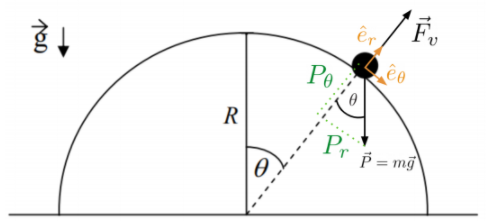

--------------------------------------------------------------------------------
a) Calcular el angulo $\theta$ para el cual se separa de la superficie esferica si inicialmente la masa $m$ es apartada en un ángulo muy pequeño de $\theta = 0$ y su velocidad inicial es nula.
--------------------------------------------------------------------------------

Cosas a notar de entrada:
* Primero: Semiesfera de radio $R$ $\Rightarrow$ $R := cte$ $\Rightarrow$ $\dot{R} = \ddot{R} = 0$ 
* Segundo: Que se separa de la superficie significa que el vinculo con la normal se pierde!.
* Tercero: Como el riel es circular, nos combiene utilizar un sistema de coordenadas polares, por lo que recordemos que la exprecion más general para la aceleración en coordenadas polares es: 
$$\overline{a}(t) = (\ddot{R} - R \dot{\theta}^2 , 2 \dot{R} \dot{\theta} + R \ddot{\theta})(\hat{r}, \hat{\theta}) $$

## Ecuaciones de Newton:

$\left\{ \begin{array}{cc}
  \sum F_r = \overline{P}_r + \overline{F}_v = N - m g \cos{\theta} = m (\ddot{R} - R \dot{\theta}^2) \underbrace{=}_{R:=cte} - m R \dot{\theta}^2  & (1)\\
  \sum F_{\theta} = P_{\theta} = m g \sin{\theta} = m (2 \dot{R} \dot{\theta} + R \ddot{\theta}) \underbrace{=}_{R:=cte} m R \ddot{\theta} & (2)
\end{array}\right.$

Como sabemos, la pelota esta apollada sobre el riel, no va a pasar nunca para el otro lado (por lo menos en este problema), por lo que la fuerza de vinculo siempre sera en  el sentido positivo del versor $\hat{r}$.

Otra cosa a notar es, nosotros tomamos $R := cte$, es decir, estamos pidiendo que a pelota siempre este pegada al riel, ya que lo que nos importa es el punto justo en el cual la bolita se despega del riel, no nos importa que pasa cuando se va mas alla, nos importa en que ángulo $\theta$ va a pasar dicho desprendimiento.

Notemos, que $N$ tiene que ser un número mayor o igual que cero, esto es porque la superficie puede empujar a la particula hacia afuera de la semiesfera, pero jamas podria atraerla hacia el interior.

Las ecuaciónes (1) y (2) determinan la dinámica del problema, siempre y cuando la particula se mantenga en el riel. Estas conforman un sistema de ecuaciónes (diferenciales) con dos incognitas $\theta$ y $N$. 

En principio, resolver la ecuación (2) analiticamente es imposible, siendo si una posibilidad resolverla de forma numerica o aproximando al $\sin{\theta} \approx \theta$ tomando en cuenta que esto solo pasa para $\theta << 1$. Igualmente, este paso no es necesario para el problema, ya que el objetivo es averiguar en qué lugar se despega la partícula de la superficie, asi que lo que en realidad queremos es que la normal se anule, es decir, no hace falta calcular las funciones temporales $\theta(t)$ y $N(t)$.

A partir de la ecuacion (8), despejamos la normal y tenemos que:
$$N = mg\cos{\theta} - m R \dot{\theta}^2 \hspace{2cm} (3)$$

Surge acá el problema de que no sabemos como es $\dot{\theta}$, pero, como queremos saber $N(\theta)$, nos basta calcular $\dot{\theta}(\theta)$.

Si aplicamos la regra de la cadena a $\ddot{\theta}$, obtenemos:
$$\ddot{\theta} = \frac{d \dot{\theta}}{dt} = 
\frac{d \dot{\theta}}{ d \theta} \frac{d \theta}{ d t} = 
\dot{\theta} \frac{d \dot{\theta}}{ d \theta}$$

De (2), resulta que:
$$mg\sin{\theta} = mR\ddot{\theta} \Leftrightarrow \frac{g\sin{\theta}}{R} = \ddot{\theta}$$

Si aplicamos este resultado a la ecuación de movimiento (2):
$$\frac{g\sin{\theta}}{R} = \dot{\theta} \frac{d \dot{\theta}}{ d \theta}$$
Integrando:
$$\frac{g}{R} \int_{0}^{\theta} \sin{\theta} d \theta = \int_{0}^{\dot{\theta}(\theta)} \dot{\theta} d \dot{\theta} \Leftrightarrow -\frac{g}{R} (\cos{\theta} - 1) = \frac{\dot{\theta} ^2}{2}$$

Ahora, reemplazando en la ecuación (3) este resultado:
$$N(\theta) = mg\cos{\theta} - 2m R (-\frac{g}{R} (\cos{\theta} - 1)) =  
mg\cos{\theta} + 2m g (\cos{\theta} - 1)) = mg(3 \cos{\theta} - 2 )$$
$$ N(\theta) = mg(3 \cos{\theta} - 2 ) \hspace{2cm} (4) $$

Notemos que esta función depende de las condiciones iniciales de las cuales se parten. 

Ahoram como queremos buscar el ángulo para el cual la particula se despega de la superficie, igualamos la ecuación $N(\theta = 0)$ para obtener el ángulo en el cual se separa ($\theta_{sep}$), esto es:
$$\cos{\theta_{sep}} = \frac{2}{3} \Leftrightarrow \theta_{sep} = \arccos{\frac{2}{3}} \approx 48,2^\circ$$ 

Lo más imprecionante de este resultado es que **"Este angulo no depende de nada"**, ya sea un sacapuntas callendose desde una pelora a una persona rodando a travez del el techo de un domo, si las condiciones iniciales son las mismas el ángulo al que se desprenden ambas cosas va a ser $\approx 48,2^\circ$. 

--------------------------------------------------------------------------------
b) Si la masa $m$ se engarza en un riel semicircular sin fricción de radio $R$, hallar la velocidad con que llega al suelo. ¿Qué aceleración tangencial tiene $m$ en ese instante?
--------------------------------------------------------------------------------

Nos piden la velocidad con la que llega al suelo, esto es cual es el valor de $\overline{v}(\theta=\frac{\pi}{2}) = R \dot{\theta}$ y tambien nos piden la **aceleración tangencial que tiene la masa cuando llega al suelo**, esto es, que valor tiene $R \ddot{\theta}$ cuando $\theta=\frac{\pi}{2}$.

Como me dicen que la particula esta engarzada, signivica que $N \neq 0$, $\forall t$.

Veamos como va a ser la velocidad. En el inciso anterior, ya calculamos una función para $\dot{\theta}(\theta)$ (Ojo!! en función de $\theta$) la cual se calculo a partir de la ecuación de movimiento. 

Despejando, obtenemos:
$$   
\dot{\theta} = \sqrt{2 \frac{g}{R} (1 - \cos{\theta} )}
$$
Notar que esta ecuación sigue valiendo, porque el vinculo $R=cte$ se digue cumpliendo. 

Ahora, en $\theta=\frac{\pi}{2}$, esta vale: 
$$\dot{\theta}(\frac{\pi}{2}) = \sqrt{2 \frac{g}{R}}$$
Y teniendo en cuenta que la ecuación de la velocidad esta dada por $\overline{v} = R \dot{\theta}$, tenemos que:
$$\overline{v}(\frac{\pi}{2}) = R \sqrt{2 \frac{g}{R}} = \sqrt{2 g R}$$

Bueno, esa es la velocidad que tiene al llegar al piso. Falta saber que  aceleracion tangencial tiene en ese punto. Es intuitivo pensar que, si el cuerpo esta "paralelo" al piso, la aceleración va a ser la de la gravedad.

En efecto, de la ecuación $\frac{g\sin{\theta}}{R} = \ddot{\theta}(\theta)$, al evaluar en $\theta = \frac{\pi}{2}$, tenemos que:

$$ \ddot{\theta}(\frac{\theta}{2}) =\frac{g\sin{\frac{\theta}{2}}}{R} = \frac{g}{R}  \Leftrightarrow R \ddot{\theta} = g$$

Y como intuimos, así es, la aceleración tangencial en dicho instante es $g$.

--------------------------------------------------------------------------------
c) Si la bolita está engarzada en el riel, estime numéricamente el tiempo que tarda en llegar al suelo si $R = 1 cm$, $10cm$, $50cm$ y $100cm$. Confeccione un grafico del tiempo de llegada en funcion de $g/R$
--------------------------------------------------------------------------------

In [36]:
#@title Funciones empleadas
def ddot_theta( R,θ ):
    """
    Función de interés, en este caso, ecuación de movimineto de un péndulo 
    simple. Ver Problema 2.10 de la Guía

    """
    return (g/R) * np.sin( θ )

def euler(t_i, t_f, R, θ_0, dθ_0, n):
    """
    Método de Euler de orden 2 (es decir, hay derivadas segundas)
  
    t  : variable tiempo
    x  : variable que depende del tiempo x(t)
    dx : derivada primera de la variable que depende del tiempo x'(t)
  
    t_i  : tiempo inicial
    t_f  : tiempo final
    R    : Valor del radio de la semiesfera
    θ_0  : valor inicial de la variable que depende del tiempo
    dθ_0 : valor inicial de la derivada primera de la variable x
    """
  
    # Inicializo (defino) los arreglos de x(t) y x'(t) que voy a calcular
    θ_array  = np.zeros(n)
    dθ_array = np.zeros(n)

    # Defino un paso de tiempo dt (finito)
    dt = ( t_f - t_i ) / n

    # Valores iniciales
    t  = t_i
    θ  = θ_0
    dθ = dθ_0
    for i in range(n):
      dθ += dt * ddot_theta(R,θ)
      θ  += dt * dθ
      t  +=  t + dt
      # Guardo los valores de θ(t) y (dθ/dt)(t) en los arreglos
      θ_array[i]  = θ
      dθ_array[i] = dθ     
      
    return θ_array, dθ_array

In [41]:
#@title Definicion de variables

# Valor de pi segun numpy
π   = np.pi
# Valor de la gravedad de la Tierra, [ m/s^2 ]
g   = 9.8   
# Radios segun el problema en [m]
R_1 =  0.01
R_2 =  0.1
R_3 =  0.5
R_4 =  1 
# Velocidad inicial con la cual se empieza a mover, [ m/s ]
v_0 = 0.1 
# Valor inicial del ángulo, [rad]
θ_0 = 0.0  
# Valor de dθ/dt(t = 0) [ s^{-1}]
dθ_01 = v_0/R_1
dθ_02 = v_0/R_2
dθ_03 = v_0/R_3
dθ_04 = v_0/R_4
# Parámetros para la resolución numérica
n   = 50000 # número de pasos --> cuanto más grande n, más chico dt y mejor la solución
t_i = 0
t_f = 3

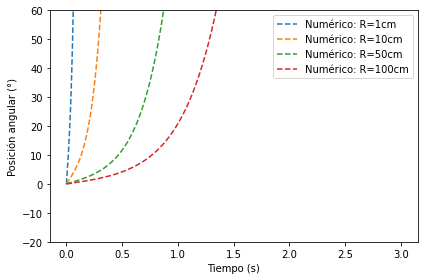

In [44]:
#@title Resolución Numerica 

# arreglo de tiempos con n elementos
t_array = np.linspace( t_i, t_f, n ) 
# resolución de la ec. dif. con el método de Euler de segundo orden
θ_1_array, dθ_array = euler(t_i, t_f, R_1, θ_0, dθ_01, n)
θ_2_array, dθ_array = euler(t_i, t_f, R_2, θ_0, dθ_02, n)
θ_3_array, dθ_array = euler(t_i, t_f, R_3, θ_0, dθ_03, n)
θ_4_array, dθ_array = euler(t_i, t_f, R_4, θ_0, dθ_04, n) 

# convierto a grados
θ_1_array = θ_1_array * (180/π)
θ_2_array = θ_2_array * (180/π)
θ_3_array = θ_3_array * (180/π)
θ_4_array = θ_4_array * (180/π)


plt.figure() 
# Graficos
plt.plot(t_array, θ_1_array, '--', label='Numérico: R=1cm') 
plt.plot(t_array, θ_2_array, '--', label='Numérico: R=10cm') 
plt.plot(t_array, θ_3_array, '--', label='Numérico: R=50cm') 
plt.plot(t_array, θ_4_array, '--', label='Numérico: R=100cm') 
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición angular (°)')

plt.ylim([-20, 60])

plt.legend(loc='upper right')
plt.tight_layout()